# Imports


In [1]:
# !pip install torchvision

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from tqdm import tqdm
import warnings
# warnings.simplefilter('ignore')

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset, Subset

import os
import torch.nn as nn
print(torch.__version__)

2.5.1+cpu


In [3]:
os.getcwd()


'D:\\NN\\CK_SGD(FirstNN)'

1  ----------------------------MUSIC--------------------------------

In [126]:
data = pd.read_csv("./music_prepared.csv")

X = data.drop("popularity", axis = 1)
y = data["popularity"]

In [127]:
# Преобразуйте признак explicit в бинарный вид
def binary(x):
    return 1 if x==True else 0

data["explicit"] = data["explicit"].apply(binary)

In [128]:
# Сделайте разбиение на обучение и тест с соотношением 80/20 и random_state=1.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4000, 15) (4000,)
(1000, 15) (1000,)


In [129]:
# Масштабируйте данные через стандартизацию
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
# Переведите признаки и целевые значения в тензоры.
X_train = torch.FloatTensor(X_train_scaled)
X_test = torch.FloatTensor(X_test_scaled)
y_train = torch.FloatTensor(np.array(y_train)).view(-1, 1)
y_test = torch.FloatTensor(np.array(y_test)).view(-1, 1)

In [131]:
# Реализуйте функцию create_model(hid_size, num_features, n_out), в которой создаётся нейросеть через модуль nn.Sequental:
# с тремя линейными слоями
# с функцией активации ReLU на промежуточных слоях
# с размером скрытого представления на первом слое 50, на втором слое 25
# с фиксированной случайностью torch.manual_seed(1).
D_in = X_train_scaled.shape[1]
D_out = y_train.shape[1]

def create_model(hid_size, num_features, n_out):
    torch.manual_seed(1)
    model = torch.nn.Sequential(
        torch.nn.Linear(num_features, 50),
        torch.nn.ReLU(),
        torch.nn.Linear(50, 25),
        torch.nn.ReLU(),
        torch.nn.Linear(25, n_out)
    )
    return model


In [132]:
model = create_model(3, D_in, D_out)
# for f in model.parameters():
    # print(f)

In [133]:
def train_model(model, opt, X_train, y_train, X_test, y_test, n_epoch=100):
    loss_fn = nn.MSELoss()
    loss_train, loss_test = [], []


    for epoch_num in range(n_epoch):
        opt.zero_grad()  # обнуление градиентов
        y_predicted = model(X_train)  # получение предсказаний
        loss = loss_fn(y_predicted, y_train)  # подсчет функции потерь

        loss.backward()  # обратный проход
        opt.step()  # шаг оптимизации
        loss_train.append(np.sqrt(loss.item()))

        y_pred = model(X_test)  # получение предсказаний на тесте
        mse = loss_fn(y_pred, y_test) # подсчет функции потерь на тесте
        loss_test.append(np.sqrt(mse.item()))

    return model, loss_train, loss_test

In [134]:
def vizual_learning(train_loss, test_loss):
    plt.plot(np.arange(0, len(train_loss)), train_loss, label = 'train')
    plt.plot(np.arange(0, len(test_loss)), test_loss,  label = 'test')
    plt.legend()

27.998669183984777

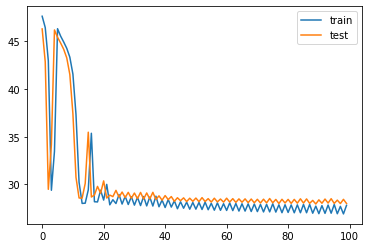

In [135]:
model = create_model(3, D_in, D_out)
optSGD = torch.optim.SGD(model.parameters(), lr = 0.01)
modelSGD, train_loss, test_loss = train_model(model, optSGD, X_train, y_train, X_test, y_test)
vizual_learning(train_loss, test_loss)
test_loss[-1]

29.32207666055561

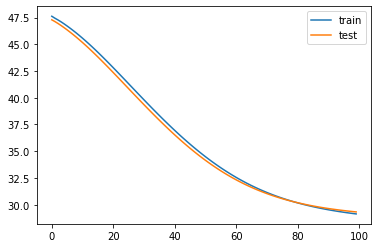

In [136]:
model = create_model(3, D_in, D_out)
optAdagrad = torch.optim.Adagrad(model.parameters(), lr = 0.01)
modelAdagrad, train_loss, test_loss = train_model(model, optAdagrad, X_train, y_train, X_test, y_test)
vizual_learning(train_loss, test_loss)
test_loss[-1]

27.612853266682595

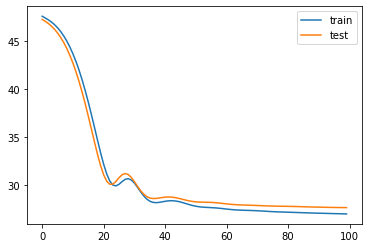

In [137]:
model = create_model(3, D_in, D_out)
optAdam  = torch.optim.Adam(model.parameters(), lr = 0.01)
modelAdam, train_loss, test_loss = train_model(model, optAdam, X_train, y_train, X_test, y_test)
vizual_learning(train_loss, test_loss)
test_loss[-1]

In [138]:
# Перейдем к задаче бинарной классификации (популярная песня/не популярная песня),
# для этого нужно перевести целевой признак popularity в бинарный вид:

In [139]:
def bin_popul(x):
    return 1 if x>50 else 0

In [140]:
y = data["popularity"].apply(bin_popul)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = torch.FloatTensor(X_train_scaled)
X_test = torch.FloatTensor(X_test_scaled)
y_train = torch.FloatTensor(np.array(y_train)).view(-1, 1)
y_test = torch.FloatTensor(np.array(y_test)).view(-1, 1)

(4000, 15) (4000,)
(1000, 15) (1000,)


In [142]:
def create_model(hid_size, num_features, n_out):
    torch.manual_seed(1)
    model = torch.nn.Sequential(
        torch.nn.Linear(num_features, 50),
        torch.nn.ReLU(),
        torch.nn.Linear(50, 50),
        torch.nn.ReLU(),
        torch.nn.Linear(50, n_out),
        torch.nn.Sigmoid()
    )
    return model

In [143]:
model = create_model(3, D_in, D_out)
predictions = model(X_test).tolist()
# predictions = np.array([int(x[0] > 0.5) for x in predictions])
predictions[0]

[0.4744380712509155]

In [144]:
def train_model(model, opt, X_train, y_train, X_test, y_test, n_epoch=100, log_period=10):
    loss_fn = torch.nn.BCELoss()
    loss_train, loss_test = [], []
    acc_train, acc_test = [], []

    for epoch_num in range(n_epoch):
        opt.zero_grad()  # обнуление градиентов
        y_predicted = model(X_train)  # получение предсказаний
        loss = loss_fn(y_predicted, y_train)  # подсчет функции потерь

        loss.backward()  # обратный проход
        opt.step()  # шаг оптимизации

        if epoch_num % log_period == 0:
            loss_train.append(loss.item())

            predictions = y_predicted.tolist()
            predictions = np.array([int(x[0] > 0.5) for x in predictions])
            acc = accuracy_score(predictions, y_train)  # подсчет метрики на обучении
            acc_train.append(acc)

            y_pred = model(X_test)  # получение предсказаний на тесте
            bce = loss_fn(y_pred, y_test)  # подсчет функции потерь на тесте
            loss_test.append(bce.item())

            predictions = y_pred.tolist()
            predictions = np.array([int(x[0] > 0.5) for x in predictions])
            acc = accuracy_score(predictions, y_test)  # подсчет метрики на тесте
            acc_test.append(acc)

    return model, loss_train, loss_test, acc_train, acc_test

0.18100000000000005


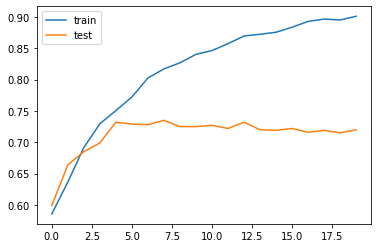

In [145]:
model = create_model(3, D_in, D_out)
optAdam  = torch.optim.Adam(model.parameters(), lr = 0.01)
modelAdam, train_loss, test_loss, acc_train, acc_test  = train_model(model, optAdam, X_train, y_train, X_test, y_test, n_epoch=200)
print(acc_train[-1]-acc_test[-1])
vizual_learning(acc_train, acc_test)

In [146]:
def create_model(hid_size, num_features, n_out):
    torch.manual_seed(1)
    model = torch.nn.Sequential(
        torch.nn.Linear(num_features, 50),
        torch.nn.BatchNorm1d(50),
        torch.nn.ReLU(),
        torch.nn.Dropout(),
        torch.nn.Linear(50, 50),
        torch.nn.BatchNorm1d(50),
        torch.nn.ReLU(),
        torch.nn.Dropout(),
        torch.nn.Linear(50, n_out),
        torch.nn.Sigmoid()
    )
    return model

0.015750000000000042


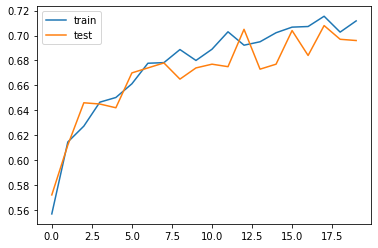

In [149]:
model = create_model(3, D_in, D_out)
optAdam  = torch.optim.Adam(model.parameters(), lr = 0.01)
modelAdam, train_loss, test_loss, acc_train, acc_test  = train_model(model, optAdam, X_train, y_train, X_test, y_test, n_epoch=200)
print(acc_train[-1]-acc_test[-1])
vizual_learning(acc_train, acc_test)

2  ----------------------------FRUITS--------------------------------

In [2]:
from torchvision.transforms import v2

# transforms = v2.Compose([
#     v2.ToDtype(torch.float32, scale=True)
# ])

classes = ["Apple Granny Smith",
           "Avocado",
           "Banana",
           "Cherry",
           "Corn",
           "Kiwi",
           "Lemon",
           "Orange",
           "Peach",
           "Pepper Red",
           "Pineapple",
           "Plum",
           "Pomegranate",
           "Strawberry",
           "Watermelon"]

Dataset ImageFolder
    Number of datapoints: 7342
    Root location: ./Fruits
    StandardTransform
Transform: Compose(
               ToTensor()
           )
1469


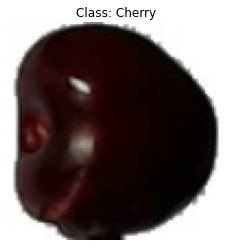

'Cherry'

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import random_split

# Путь к директории с данными
data_dir = './Fruits'  # Убедитесь, что здесь указан правильный путь к вашим данным

from torchvision.transforms import v2

# Трансформации для предобработки изображений
transform = transforms.Compose([
    transforms.ToTensor()           # Преобразование в тензор
])

# Загрузка датасета с помощью ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

#train/test split
generator2 = torch.Generator().manual_seed(2)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train, test = random_split(dataset, [train_size, test_size], generator=generator2)
print(test.dataset)
print(len(test))
# Создаем DataLoader
torch.manual_seed(1)
train_loader = DataLoader(train, batch_size=64, shuffle=True)
test_loader = DataLoader(test, batch_size=64, shuffle=True)

# torch.manual_seed(1)
# # Пример итерации по DataLoader
# for images, labels in train_loader:
#     print(images.shape)  # Размер батча изображений
#     print(labels)        # Метки классов
#     break  # Удалите этот break, чтобы пройти по всему датасету
    
torch.manual_seed(1)
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Visualize the first image in the batch and print its class label
plt.imshow(images[0].permute(1, 2, 0))  # Convert from CxHxW to HxWxC format for display
plt.title(f"Class: {classes[labels[0]]}")
plt.axis('off')
plt.show()

# Output class name of the first image
classes[labels[0].item()]

In [4]:
D_in = 3*100*100
D_out = len(dataset.classes)

In [5]:
def create_model(hid_size, num_features, n_out):
    torch.manual_seed(1)
    model = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(num_features, 50),
        torch.nn.ReLU(),
        torch.nn.Linear(50, 50),
        torch.nn.ReLU(),
        torch.nn.Linear(50, n_out),
        # torch.nn.Softmax(dim=1)
    )
    return model

In [6]:
model = create_model(3, D_in, D_out)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=30000, out_features=50, bias=True)
  (2): ReLU()
  (3): Linear(in_features=50, out_features=50, bias=True)
  (4): ReLU()
  (5): Linear(in_features=50, out_features=15, bias=True)
)

In [7]:
torch.manual_seed(1)
data_iter = iter(test_loader)
images, labels = next(data_iter)
model(images)[0]

tensor([ 0.0455,  0.1415,  0.0801, -0.1036, -0.0967, -0.0425, -0.0080, -0.0114,
        -0.1266, -0.0767, -0.0148,  0.0475, -0.0461, -0.1642, -0.1814],
       grad_fn=<SelectBackward0>)

In [8]:
from tqdm import tqdm

def train_model(model, opt, train_loader, test_loader, n_epoch=5):
    loss_fn = torch.nn.CrossEntropyLoss()
    acc_train_list, acc_test_list = [], []

    for epoch_num in range(n_epoch):
        train_loss, test_loss = 0.0, 0.0
        correct_train, correct_test = 0, 0
        total_train, total_test = 0, 0

        for images, labels in tqdm(train_loader):
            opt.zero_grad()  # обнуление градиентов
            y_predicted = model(images)  # получение предсказаний
            loss = loss_fn(y_predicted, labels)  # подсчет функции потерь

            loss.backward()  # обратный проход
            opt.step()  # шаг оптимизации

            # фиксация функции потерь и accuracy на обучении
            train_loss += loss.item()  # суммируем ошибку
            total_train += len(labels)  # суммируем кол-во объектов
            _, predicted = torch.max(y_predicted, 1)  # получаем предсказанные классы
            correct_train += (predicted == labels).sum().item()  # суммируем кол-во правильных классификаций

        # вычисляем значение функции потерь и метрик на обучении на всем train_loader
        train_acc = correct_train / total_train
        train_loss = train_loss / total_train
        acc_train_list.append(train_acc)

        
        for images, labels in test_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # фиксация функции потерь и accuracy на тесте
            test_loss += loss.item()  # суммируем ошибку
            total_test += len(labels)  # суммируем кол-во объектов
            _, predicted = torch.max(model(images), 1)  # получаем предсказанные классы
            correct_test += (predicted == labels).sum().item()  # суммируем кол-во правильных классификаций

        # вычисляем значение функции потерь и метрик на тесте на всем test_loader
        test_acc = correct_test/total_test
        test_loss = test_loss/total_test

        acc_test_list.append(test_acc)


        # печатаем результаты эпохи
        print(f"Epoch {epoch_num+1}/{n_epoch} " \
              f"Train Loss: {train_loss:.3f} - Train Acc: {train_acc:.3f} " \
              f"Test Loss: {test_loss:.3f} - Test Acc: {test_acc:.3f}")

    return model, acc_train_list, acc_test_list 


In [9]:
def vizual_learning(train_loss, test_loss):
    plt.plot(np.arange(0, len(train_loss)), train_loss, label = 'train')
    plt.plot(np.arange(0, len(test_loss)), test_loss,  label = 'test')
    plt.legend()

100%|██████████| 92/92 [01:31<00:00,  1.00it/s]


Epoch 1/5 Train Loss: 0.030 - Train Acc: 0.491 Test Loss: 0.019 - Test Acc: 0.722


100%|██████████| 92/92 [00:05<00:00, 16.38it/s]


Epoch 2/5 Train Loss: 0.013 - Train Acc: 0.831 Test Loss: 0.008 - Test Acc: 0.939


100%|██████████| 92/92 [00:05<00:00, 16.79it/s]


Epoch 3/5 Train Loss: 0.006 - Train Acc: 0.956 Test Loss: 0.004 - Test Acc: 0.975


100%|██████████| 92/92 [00:05<00:00, 16.73it/s]


Epoch 4/5 Train Loss: 0.004 - Train Acc: 0.981 Test Loss: 0.003 - Test Acc: 0.990


100%|██████████| 92/92 [00:05<00:00, 16.79it/s]


Epoch 5/5 Train Loss: 0.002 - Train Acc: 0.992 Test Loss: 0.002 - Test Acc: 0.990
0.0013572976539845127


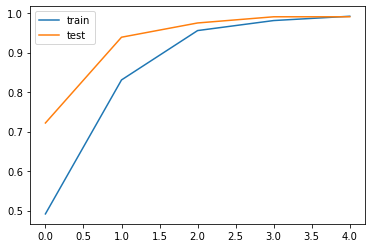

In [10]:
torch.manual_seed(1)
model = create_model(3, D_in, D_out)
optAdam  = torch.optim.Adam(model.parameters(), lr = 0.0001)
modelAdam, acc_train, acc_test  = train_model(model, optAdam, train_loader, test_loader, n_epoch=5)
print(acc_train[-1]-acc_test[-1])
vizual_learning(acc_train, acc_test)

In [11]:
torch.manual_seed(1)

data_iter = iter(test_loader)
images, labels = next(data_iter)

print(torch.max(modelAdam(images)[0]))
modelAdam(images)[0]


tensor(7.0169, grad_fn=<MaxBackward1>)


tensor([  7.0169,  -3.8307,   2.6491, -10.7195,  -3.3055,   4.0986,   1.3094,
          0.3915,  -0.2131, -12.1840,  -1.3997,  -3.4052,  -1.9533,  -4.7255,
         -2.2802], grad_fn=<SelectBackward0>)